In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Milan Škriniar,sk SVK,DF,Paris S-G+Inter,fr Ligue 1+it Serie A,0.0,1995.0,112.0,103.0,9325,103.7,0.06,0.06,0.06,0.06,0.06,0.08,0.06,0.08,28.0,23.0,82.14,4.0,14.29,80.77,8.45,35.72,40.38,4.99,0.79,80.77,0.27,0.22,0.04,53.06,246.53,121.18,0.97,0.71,0.01,0.52,0.23,61.06,0.81,0.78,0.04,0.65,0.00,0.01,0.09,0.04,0.65,0.04,0.00,0.00,0.00,0.00,0.00,7001.0,7533.0,92.94,127807.0,38169.0,2585.0,2753.0,94.52,3689.0,3846.0,95.92,586.0,742.0,78.98,0.00,0.01,0.02,-0.01,0.24,3.91,0.24,0.03,3.71,72.64,69.96,2.61,1.75,0.04,0.51,0.13,0.71,0.00,0.00,0.00,0.00,67.51,0.07,0.27,0.00,0.15,0.00,11.35,0.00,-0.5,-0.5,47.20,0.10,0.01,0.01,1.22,0.71,0.03,0.77,0.92,0.00,0.01,5.27,1.21,1.34,1.43,0.83,0.49,0.10,0.76,1.25,0.49,0.99,0.64,2.20,2.66,0.07,61.21,4,0,0,3,1,0
1,1,Maxence Lacroix,fr FRA,DF,Wolfsburg,de Bundesliga,0.0,2000.0,111.0,103.0,9070,100.8,0.06,0.08,0.06,0.08,0.04,0.06,0.04,0.06,75.0,58.0,77.33,17.0,22.67,70.67,8.29,37.50,31.56,2.13,0.84,70.67,0.74,0.58,0.17,40.25,207.32,110.79,0.57,0.47,0.05,0.73,0.26,43.50,0.27,0.87,0.06,0.72,0.02,0.03,0.07,0.02,0.72,0.05,0.00,0.00,0.01,0.00,0.00,4893.0,5859.0,83.51,102529.0,36399.0,1344.0,1562.0,86.11,2923.0,3193.0,91.54,645.0,1011.0,63.80,0.01,0.02,0.03,-0.00,0.22,3.36,0.19,0.02,4.02,58.13,55.23,2.72,2.26,0.03,0.47,0.21,0.11,0.00,0.00,0.00,0.00,48.54,0.18,0.51,0.00,0.14,0.00,10.89,0.00,1.8,1.8,57.18,0.16,0.06,0.02,1.06,0.82,0.01,1.74,1.03,0.00,0.04,5.95,2.48,1.86,1.77,1.20,0.53,0.04,0.89,1.40,0.5

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (DF) and midfielders (MF) from the 'final_player' DataFrame
defender_players = final_player[final_player['Pos'].isin(['DF'])]
newbie = newbie[newbie['Pos'].isin(['DF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['DF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['DF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['DF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['DF'])]

# Reset the index if needed
defender_players = defender_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)
player_2024=player_2024.reset_index(drop=True)

In [6]:
Dimarco=defender_players[defender_players['Player']=='Federico Dimarco']
Dimarco


,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
157,409,Federico Dimarco,it ITA,DF,Inter+Hellas Verona,it Serie A,0.0,1997.0,130.0,97.0,8189,91.0,0.18,0.34,0.18,0.34,0.14,0.45,0.12,0.44,73.0,31.0,42.47,40.0,54.79,70.57,2.52,17.05,28.67,25.82,2.7,70.56,0.8,0.34,0.44,38.15,180.33,105.59,2.32,1.52,0.36,0.96,0.41,45.84,7.05,4.62,0.4,2.58,1.47,0.11,0.28,0.1,2.58,0.26,0.07,0.01,0.06,0.0,0.0,4250.0,5660.0,75.09,76438.0,24106.0,1841.0,1997.0,90.59,1651.0,2054.0,80.38,522.0,1117.0,46.73,0.07,0.31,0.27,-0.15,2.64,3.8,1.79,1.01,4.99,62.2,51.1,10.9,2.32,0.01,0.64,8.96,4.91,3.43,1.01,2.06,0.0,46.7,0.2,1.3,0.0,0.7,0.0,5.31,0.0,3.7,4.7,38.43,0.08,0.0,0.0,0.78,1.26,0.2,1.02,0.92,0.0,0.02,5.67,0.37,0.61,1.46,0.64,0.59,0.23,0.57,1.17,0.59,0.63,0.19,2.48,1.35,0.02,48.57,4,0,0,4,0,0


In [7]:
Dimarco_2024=player_2024[player_2024['Player']=='Federico Dimarco']
Dimarco_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
138,717,Federico Dimarco,it ITA,DF,Inter,it Serie A,0.0,1997.0,30,29,2077,23.1,0.22,0.48,0.22,0.48,0.13,0.49,0.12,0.48,18.0,6.0,33.3,12.0,66.7,66.58,1.52,14.72,24.76,27.75,3.2,66.58,0.78,0.26,0.52,36.41,150.95,83.29,2.21,1.47,0.43,1.26,0.3,45.76,8.57,4.68,0.61,3.38,0.91,0.09,0.22,0.04,0.04,0.43,0.09,0.0,0.09,0.0,0.0,1027.0,1328.0,77.3,17596.0,5513.0,495.0,541.0,91.5,390.0,491.0,79.4,111.0,211.0,52.6,0.26,0.37,0.32,-0.11,2.64,2.6,2.47,1.3,4.33,57.49,48.31,8.96,1.04,0.04,0.26,8.48,5.37,2.55,0.95,1.3,0.0,44.46,0.22,1.47,2.21,0.82,0.1,0.26,0.05,2.1,2.3,40.0,0.0,0.0,0.0,0.52,0.91,0.22,0.39,1.08,0.0,0.0,4.29,0.26,0.39,1.82,0.82,0.61,0.39,0.74,1.52,0.78,0.78,0.13,2.21,1.47,0.04,48.6


In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
Dimarco_percentile_ranks = round(players_percentile_ranks.iloc[[157]],0)

# Print the percentile ranks for Declan Rice
print(Dimarco_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
157         98.0       98.0        98.0          98.0      98.0         100.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
157        98.0           100.0                76.0           70.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
157            18.0              84.0               92.0            72.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
157                     9.0                    13.0                    50.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
157                    98.0                    97.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
157                       72.0                       57.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
157                  46.0                     67.0            59.0   

     Tota

In [9]:
# Extract the percentile ranks, transpose, and sort them in descending order
Dimarco_percentile_ranks_percentile_ranks_sorted = Dimarco_percentile_ranks.T.sort_values(by=157, ascending=False)

# Get the top 20 parameters
top_20_params = Dimarco_percentile_ranks_percentile_ranks_sorted.index[:30]
top_20_params_values = Dimarco_percentile_ranks_percentile_ranks_sorted[157].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['xAG_per_90', 'Key_Passes_per_90', 'xG+xAG_per90', 'npxG+xAG_per90',
       'Pass_Dead_Shot_per_90', 'Shot-Shot_per_90', 'Pass_Live_Shot_per_90',
       'Corner_Kicks_per_90', 'Crosses_per_90', 'Crosses_Penalty_Area_per_90',
       'Out_Corner_Kicks_per_90', 'Npxg_net', 'Defensive_Shot_per_90',
       'xA_per_90', 'Passes_Penalty_Area_per_90', 'In_Corner_Kicks_per_90',
       'Goals_per90', 'G+A_per90', 'npxG_per90', 'G-PK_per90',
       'Touches_Att_3rd_per_90', 'G+A-PK_per90', 'xG_per90', 'Xg_net',
       'Touches_Att_Pen_per_90', 'Pass_Dead_Goal_per_90',
       'Shots_on_target_per90', 'Shot_Goal_per_90',
       'Shot_Creating_Action_per90', 'Progressive_Passes_Received_per_90'],
      dtype='object')
Values:
xAG_per_90                            100.0
Key_Passes_per_90                     100.0
xG+xAG_per90                          100.0
npxG+xAG_per90                        100.0
Pass_Dead_Shot_per_90                 100.0
Shot-Shot_per_90                

In [10]:
params = ['Key_Passes_per_90', 'Shot_Creating_Action_per90', 'xAG_per_90', '1/3_Carries_per_90', 
          'Crosses_Penalty_Area_per_90', 'Npxg_net', 'Progressive_Carries_per_90', 
          'Crosses_per_90', 'Goals_per90', 'xG_per90', 'Shot_Creating_Action_per90',
          'Progressive_Passes_Received_per_90', 'G+A_per90', 
          'Touches_Att_Pen_per_90', 'Touches_Att_3rd_per_90']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Dimarco Hernandez's stats from the percentile ranks DataFrame
Dimarco_percentile_ranks = round(players_percentile_ranks.iloc[[157]],0)

# Print the percentile ranks for the player
Dimarco_percentile_ranks


,Key_Passes_per_90,Shot_Creating_Action_per90,xAG_per_90,1/3_Carries_per_90,Crosses_Penalty_Area_per_90,Npxg_net,Progressive_Carries_per_90,Crosses_per_90,Goals_per90,xG_per90,Shot_Creating_Action_per90,Progressive_Passes_Received_per_90,G+A_per90,Touches_Att_Pen_per_90,Touches_Att_3rd_per_90
157,100.0,97.0,100.0,78.0,99.0,99.0,85.0,99.0,98.0,98.0,97.0,96.0,98.0,97.0,98.0


In [11]:
Dimarco_percentile_ranks_list = Dimarco_percentile_ranks.values.flatten().tolist()

Dimarco_percentile_ranks_list

[100.0,
 97.0,
 100.0,
 78.0,
 99.0,
 99.0,
 85.0,
 99.0,
 98.0,
 98.0,
 97.0,
 96.0,
 98.0,
 97.0,
 98.0]

In [12]:
# Calculate percentile ranks for players in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
Dimarco_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[138]],0)

# Print the percentile ranks for the player
Dimarco_2024_percentile_ranks


,Key_Passes_per_90,Shot_Creating_Action_per90,xAG_per_90,1/3_Carries_per_90,Crosses_Penalty_Area_per_90,Npxg_net,Progressive_Carries_per_90,Crosses_per_90,Goals_per90,xG_per90,Shot_Creating_Action_per90,Progressive_Passes_Received_per_90,G+A_per90,Touches_Att_Pen_per_90,Touches_Att_3rd_per_90
138,99.0,100.0,100.0,76.0,100.0,99.0,84.0,99.0,99.0,97.0,100.0,99.0,99.0,99.0,99.0


In [13]:
Dimarco_2024_percentile_ranks_list = Dimarco_2024_percentile_ranks.values.flatten().tolist()

Dimarco_2024_percentile_ranks_list

[99.0,
 100.0,
 100.0,
 76.0,
 100.0,
 99.0,
 84.0,
 99.0,
 99.0,
 97.0,
 100.0,
 99.0,
 99.0,
 99.0,
 99.0]

In [14]:
params = ['Key_Passes_per_90', 'Shot_Creating_Action_per90', 'Expected_Assisted_Goals_per_90', 'Final_Third_Carries_per_90', 
          'Crosses_Penalty_Area_per_90', 'NonPenalty_xG_Goals_Difference', 'Progressive_Carries_per_90', 
          'Crosses_per_90', 'Goals_per90', 'xG_per90', 'Shot_Creating_Action_per90',
          'Progressive_Passes_Received_per_90', 'Goals_+_Assists_per90', 
          'Touches_Attacking_Penalty_Area_per_90', 'Touches_Attacking_Third_per_90']


split_params = [param.replace('_', '\n') for param in params]

In [15]:
image_path = "Dimarco.png"
fdj_cropped = Image.open(image_path)


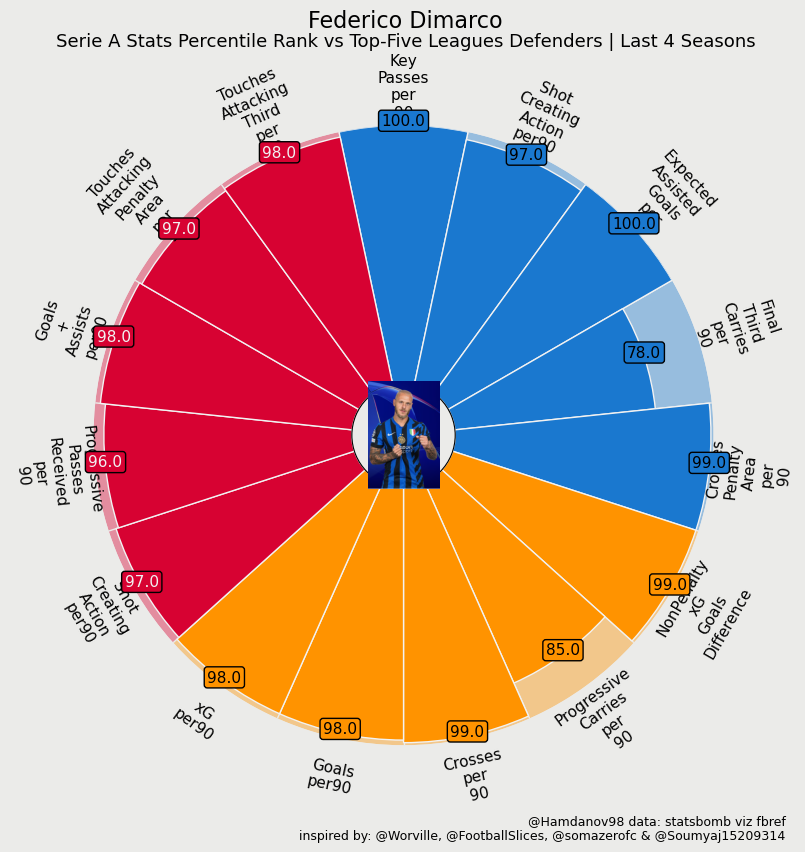

In [16]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Dimarco_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Federico Dimarco", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues Defenders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Dimarco_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


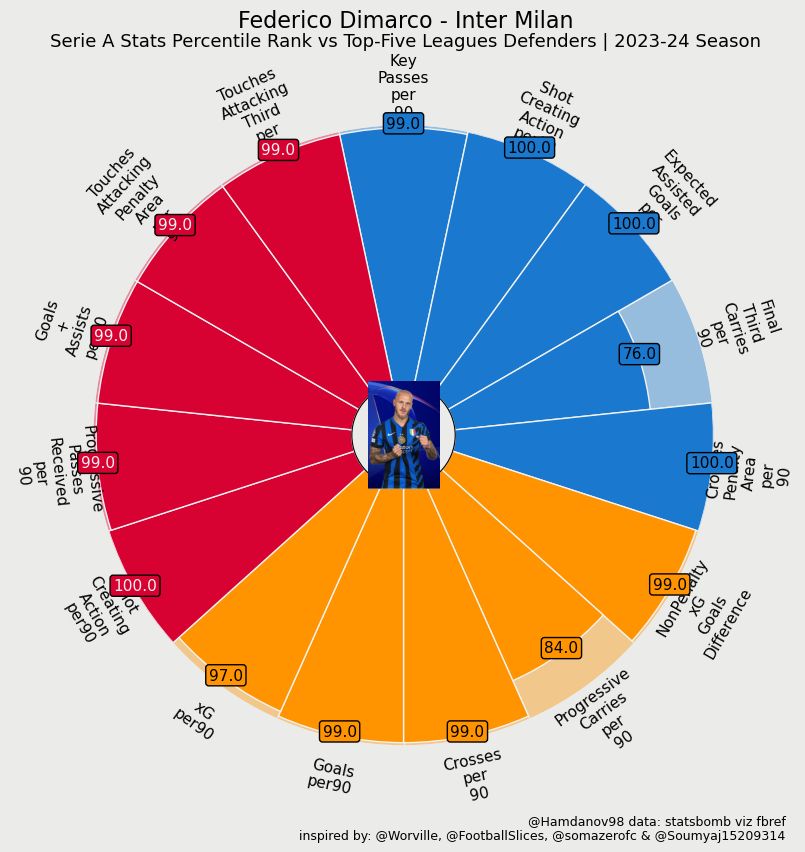

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Dimarco_2024_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Federico Dimarco - Inter Milan", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues Defenders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Dimarco_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [18]:
params = ['Key_Passes_per_90', 'Shot_Creating_Action_per90', 'xAG_per_90', '1/3_Carries_per_90', 
          'Crosses_Penalty_Area_per_90', 'Npxg_net', 'Progressive_Carries_per_90', 
          'Crosses_per_90', 'Goals_per90', 'xG_per90', 'Shot_Creating_Action_per90',
          'Progressive_Passes_Received_per_90', 'G+A_per90', 
          'Touches_Att_Pen_per_90', 'Touches_Att_3rd_per_90']

In [19]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90', 'Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in defender_players.columns:
        defender_players[feature] = -defender_players[feature]
        player_2024[feature]=-player_2024[feature]

In [20]:
# Normalize data
numerical_defense_players = defender_players[params].replace([np.inf, -np.inf], 0)
normalized_defense_players = (numerical_defense_players - numerical_defense_players.mean()) / numerical_defense_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_defense_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [21]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_defense_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=defender_players.index)

In [23]:
# Get de Ligt's row and compute cosine similarity
Dimarco_index = defender_players.index[defender_players['Player'] == 'Federico Dimarco'][0]
Dimarco_data = transformed_df.loc[Dimarco_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=Dimarco_index)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, Dimarco_data).flatten()
transformed_df['similarity_to_Dimarco'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_Dimarco', ascending=False).index
top_similar_players = defender_players.loc[top_similar_players_indices]

In [25]:
# Visualize the results
defender_players['similarity_to_Dimarco'] = transformed_df['similarity_to_Dimarco']
defense_players_sorted = defender_players.sort_values(by='similarity_to_Dimarco', ascending=False)
defense_players_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_Dimarco
271,695,Przemysław Frankowski,pl POL,DF,Lens,fr Ligue 1,0.0,1995.0,104.0,83.0,7473,83.1,0.17,0.29,0.12,0.24,0.12,0.30,0.08,0.24,100.0,41.0,41.00,55.0,55.00,65.62,2.35,13.75,26.58,25.79,2.11,65.56,1.21,0.49,0.66,40.61,212.97,87.44,1.93,1.63,0.28,-1.26,-0.56,39.78,8.06,3.22,0.29,2.28,0.65,0.11,0.08,0.05,2.28,0.22,0.05,0.00,0.01,0.01,0.00,3528.0,4597.0,77.00,57364.0,18712.0,1759.0,2005.0,88.00,1394.0,1687.0,78.00,264.0,524.0,50.00,0.02,0.18,0.18,-0.05,1.72,2.73,1.54,0.61,4.01,55.32,44.92,10.15,0.96,0.11,0.18,5.35,7.68,1.51,0.58,0.69,0.00,42.45,0.24,1.32,1.10,0.33,4.19,13.95,1.96,3.7,3.7,41.00,-0.16,-0.00,-0.00,-1.25,0.47,0.09,1.13,1.55,0.00,-0.01,4.62,0.49,-0.70,2.33,1.01,1.01,0.31,1.27,2.74,1.47,1.14,0.16,3.46,1.56,0.02,46.71,3,0,0,0,3,0,0.980335
343,858,Pedro Porro,es ESP,DF,Tottenham,eng Premier League,22.0,1999.0,50.0,48.0,4220,46.9,0.13,0.34,0.13,0.34,0.11,0.32,0.11,0.32,98.0,40.0,41.00,47.0,48.00,76.82,4.39,21.94,29.66,25.88,2.00,76.82,2.09,0.85,1.00,38.21,165.61,91.35,1.94,1.34,0.30,-1.11,-0.47,45.84,5.40,3.16,0.38,2.02,0.75,0.11,0.15,0.11,2.02,0.32,0.07,0.00,0.00,0.00,0.00,2271.0,3017.0,75.00,34993.0,13123.0,1298.0,1443.0,90.00,747.0,966.0,77.00,164.0,395.0,42.00,0.15,0.22,0.17,-0.01,1.62,3.48,1.52,0.51,4.97,64.33,51.86,12.20,1.32,0.45,0.32,5.86,8.23,2.65,1.02,1.02,0.02,48.42,0.28,2.07,1.68,0.41,1.69,6.72,1.38,1.3,1.3,39.00,-0.07,-0.00,-0.00,-1.05,0.92,0.04,1.04,1.69,0.00,-0.02,6.06,0.34,-0.53,

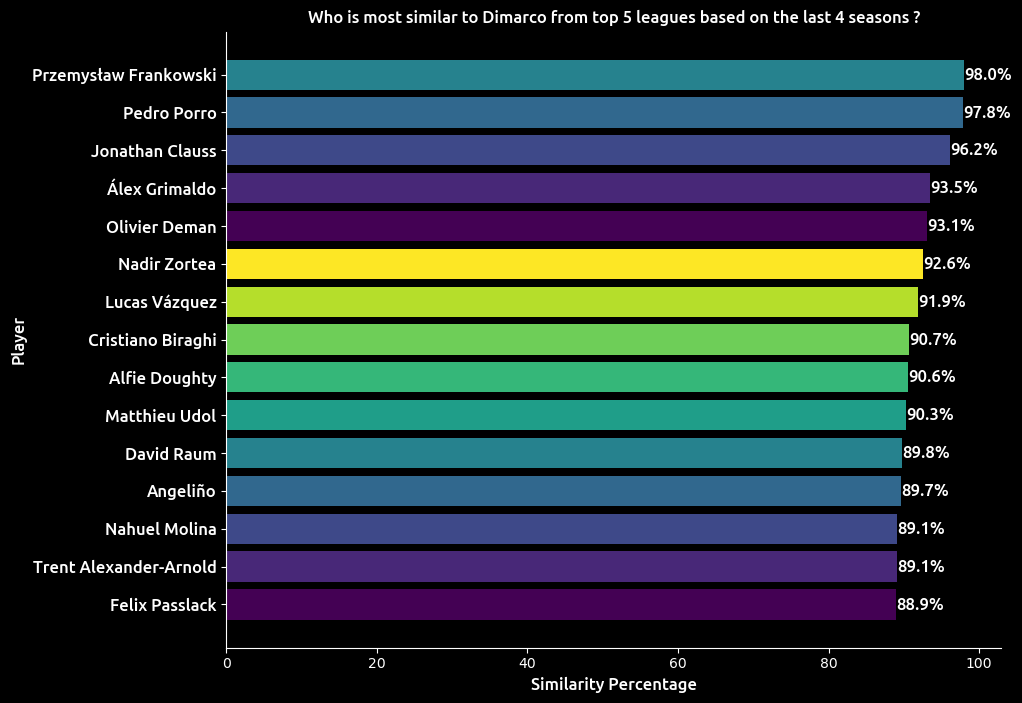

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')



# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(defense_players_sorted['Player'].head(15)[::-1], (defense_players_sorted['similarity_to_Dimarco'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Dimarco from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(defense_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()

In [39]:
Raum=defender_players[defender_players['Player']=='David Raum']
Raum

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_Dimarco
255,645,David Raum,de GER,DF,RB Leipzig+Hoffenheim,de Bundesliga,0.0,1998.0,91.0,81.0,7181,79.7,0.07,0.33,0.07,0.33,0.03,0.33,0.03,0.33,133.0,59.0,44.0,68.0,51.0,76.6,2.52,20.23,30.58,26.45,1.88,76.6,1.67,0.74,0.85,39.35,178.74,92.97,2.71,1.33,0.51,-1.18,-0.49,45.62,7.54,3.78,0.47,2.24,1.23,0.16,0.1,0.05,2.24,0.3,0.11,0.04,0.01,0.0,0.0,3927.0,5346.0,73.0,68635.0,24699.0,1828.0,2077.0,88.0,1605.0,1903.0,78.0,409.0,894.0,46.0,0.1,0.29,0.37,-0.03,2.35,3.0,2.03,1.26,4.14,67.08,52.22,14.62,1.63,0.08,0.3,9.51,9.3,3.69,1.4,1.57,0.03,49.27,0.24,1.89,0.67,0.21,2.56,7.86,1.33,1.9,1.9,51.0,-0.2,-0.0,-0.0,-0.95,0.73,0.16,0.88,1.12,0.0,-0.03,6.06,0.89,-0.85,1.87,0.97,0.64,0.26,1.02,1.89,0.88,1.42,0.25,2.75,1.84,0.05,54.11,3,0,0,0,0,3,0.898212


In [27]:
Angelino=defender_players[defender_players['Player']=='Angeliño']
Angelino

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_Dimarco
59,171,Angeliño,es ESP,DF,Roma+Hoffenheim+RB Leipzig,it Serie A+de Bundesliga,0.0,1997.0,104.0,94.0,8217,91.3,0.07,0.26,0.07,0.26,0.07,0.28,0.07,0.28,92.0,49.0,53.26,38.0,41.3,66.36,2.4,16.76,28.13,21.89,1.95,66.36,1.01,0.54,0.42,31.35,132.1,64.23,1.29,1.05,0.32,-1.01,-0.58,39.2,6.5,3.29,0.33,2.29,0.63,0.11,0.14,0.07,2.29,0.23,0.05,0.01,0.02,0.01,0.0,3697.0,5275.0,70.09,64283.0,24334.0,1773.0,2002.0,88.17,1408.0,1935.0,72.76,406.0,1001.0,40.56,0.01,0.21,0.27,-0.02,1.9,2.81,1.99,1.16,3.44,57.78,45.76,11.55,1.58,0.02,0.33,6.6,8.33,1.63,0.75,0.51,0.0,40.49,0.46,1.17,0.0,0.27,0.0,5.72,0.0,-0.7,-0.7,40.09,-0.1,-0.0,-0.0,-0.68,1.11,0.21,1.05,0.82,0.0,-0.0,5.13,0.58,-0.87,1.31,0.6,0.6,0.11,0.67,1.21,0.54,0.98,0.17,2.37,2.02,0.01,55.17,4,0,0,1,0,3,0.896779


In [28]:


# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Theo Hernandez's stats from the percentile ranks DataFrame
Angelino_percentile_ranks = round(players_percentile_ranks.iloc[[59]],0)

# Print the percentile ranks for the player
Angelino_percentile_ranks


,Key_Passes_per_90,Shot_Creating_Action_per90,xAG_per_90,1/3_Carries_per_90,Crosses_Penalty_Area_per_90,Npxg_net,Progressive_Carries_per_90,Crosses_per_90,Goals_per90,xG_per90,Shot_Creating_Action_per90,Progressive_Passes_Received_per_90,G+A_per90,Touches_Att_Pen_per_90,Touches_Att_3rd_per_90
59,98.0,95.0,98.0,60.0,99.0,31.0,59.0,98.0,73.0,77.0,95.0,94.0,95.0,90.0,94.0


In [40]:


# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Theo Hernandez's stats from the percentile ranks DataFrame
Raum_percentile_ranks = round(players_percentile_ranks.iloc[[255]],0)

# Print the percentile ranks for the player
Raum_percentile_ranks


,Key_Passes_per_90,Shot_Creating_Action_per90,xAG_per_90,1/3_Carries_per_90,Crosses_Penalty_Area_per_90,Npxg_net,Progressive_Carries_per_90,Crosses_per_90,Goals_per90,xG_per90,Shot_Creating_Action_per90,Progressive_Passes_Received_per_90,G+A_per90,Touches_Att_Pen_per_90,Touches_Att_3rd_per_90
255,99.0,96.0,99.0,70.0,99.0,92.0,92.0,100.0,73.0,29.0,96.0,98.0,98.0,89.0,98.0


In [29]:
Angelino_percentile_ranks_list = Angelino_percentile_ranks.values.flatten().tolist()
Angelino_percentile_ranks_list

[98.0,
 95.0,
 98.0,
 60.0,
 99.0,
 31.0,
 59.0,
 98.0,
 73.0,
 77.0,
 95.0,
 94.0,
 95.0,
 90.0,
 94.0]

In [41]:
Raum_percentile_ranks_list = Raum_percentile_ranks.values.flatten().tolist()
Raum_percentile_ranks_list

[99.0,
 96.0,
 99.0,
 70.0,
 99.0,
 92.0,
 92.0,
 100.0,
 73.0,
 29.0,
 96.0,
 98.0,
 98.0,
 89.0,
 98.0]

In [30]:
image_path = "Angelino.jpg"
fdj_cropped = Image.open(image_path)


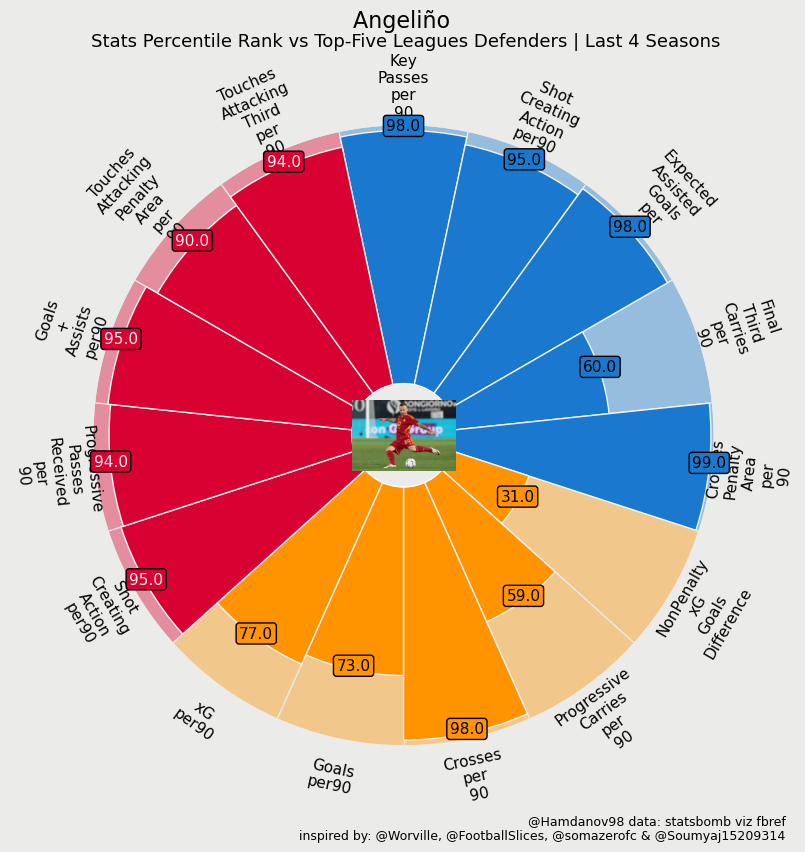

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Angelino_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Angeliño ", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Stats Percentile Rank vs Top-Five Leagues Defenders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Angelino_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png


In [42]:
image_path = "Raum.jpg"
fdj_cropped = Image.open(image_path)


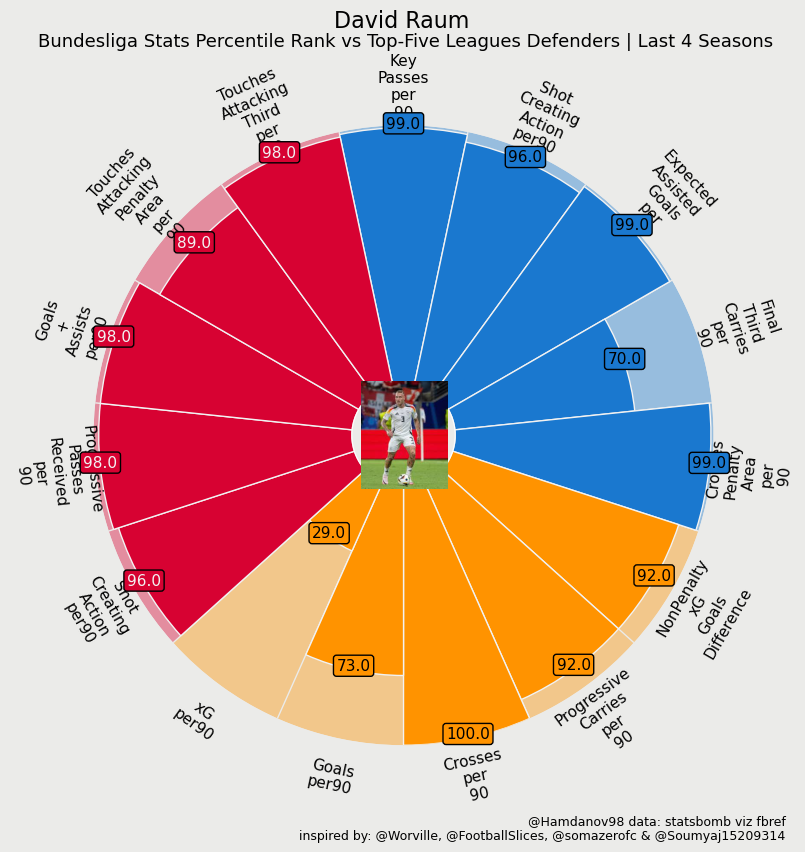

In [43]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Raum_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "David Raum ", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Defenders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Raum_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png


In [32]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [33]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [35]:
# Get de Ligt's row and compute cosine similarity
Dimarco_index = player_2024.index[player_2024['Player'] == 'Federico Dimarco'][0]
Dimarco_data = transformed_df.loc[Dimarco_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=Dimarco_index)

In [36]:
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, Dimarco_data).flatten()
transformed_df['similarity_to_Dimarco_2024'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_Dimarco_2024', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [37]:
# Visualize the results
player_2024['similarity_to_Dimarco_2024'] = transformed_df['similarity_to_Dimarco_2024']
player_2024_sorted = player_2024.sort_values(by='similarity_to_Dimarco_2024', ascending=False)
player_2024_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_Dimarco_2024
76,421,Anthony Caci,fr FRA,DF,Mainz 05,de Bundesliga,0.0,1997.0,31,29,2486,27.6,0.07,0.18,0.07,0.18,0.06,0.16,0.06,0.16,39.0,23.0,59.0,13.0,33.3,64.89,3.22,21.27,31.34,12.97,1.49,64.89,1.41,0.83,0.47,30.33,140.91,76.63,1.56,0.72,0.36,-0.83,-0.36,35.87,2.72,2.14,0.29,1.63,0.22,0.11,0.14,0.04,0.00,0.29,0.00,0.00,0.00,0.00,0.0,1118.0,1523.0,73.4,21669.0,9351.0,448.0,531.0,84.4,484.0,626.0,77.3,167.0,290.0,57.6,0.11,0.11,0.13,0.00,0.91,4.46,1.41,0.51,5.22,55.18,46.96,8.12,1.30,0.04,0.80,2.64,6.38,0.40,0.22,0.14,0.00,40.51,0.11,1.78,1.12,0.18,0.06,0.40,0.05,0.5,0.5,50.0,-0.29,-0.00,-0.00,-1.23,0.54,0.00,1.16,0.83,0.00,-0.04,6.27,1.05,-1.05,2.03,1.09,0.91,0.04,0.98,1.59,0.62,1.56,0.25,3.19,1.63,0.00,61.4,0.989051
398,2145,Pedro Porro,es ESP,DF,Tottenham,eng Premier League,0.0,1999.0,35,35,3089,34.3,0.09,0.29,0.09,0.29,0.09,0.30,0.09,0.30,57.0,26.0,45.6,24.0,42.1,81.22,4.69,22.83,32.01,27.08,2.01,81.22,1.66,0.76,0.70,39.91,159.88,85.28,1.66,1.34,0.29,-1.08,-0.44,48.69,4.61,3.12,0.35,1.92,0.82,0.12,0.15,0.12,0.00,0.26,0.09,0.00,0.00,0.00,0.0,1806.0,2369.0,76.2,27440.0,10519.0,1057.0,1171.0,90.3,579.0,745.0,77.7,121.0,297.0,40.7,0.20,0.21,0.17,-0.01,1.49,3.94,1.40,0.29,5.66,69.07,55.60,13.15,1.63,0.41,0.32,5.77,8.60,2.92,1.05,1.05,0.03,52.65,0.32,1.98,1.54,0.35,0.06,0.25,0.06,0.1,0.1,51.7,-0.09,-0.00,-0.00,-1.08,0.79,0.03,0.99,1.84,0.00,-0.03,5.80,0.44,-0.41,2.65,1.25,0.99,0.41,1.81,3.50,1.69,1.84,0.52,3.64,2.97,0.09,51.7,0.964124
159,831,Pervis Estupiñán,ec ECU,DF,Brighton,eng Premier League,0.0,1998.0,19,1

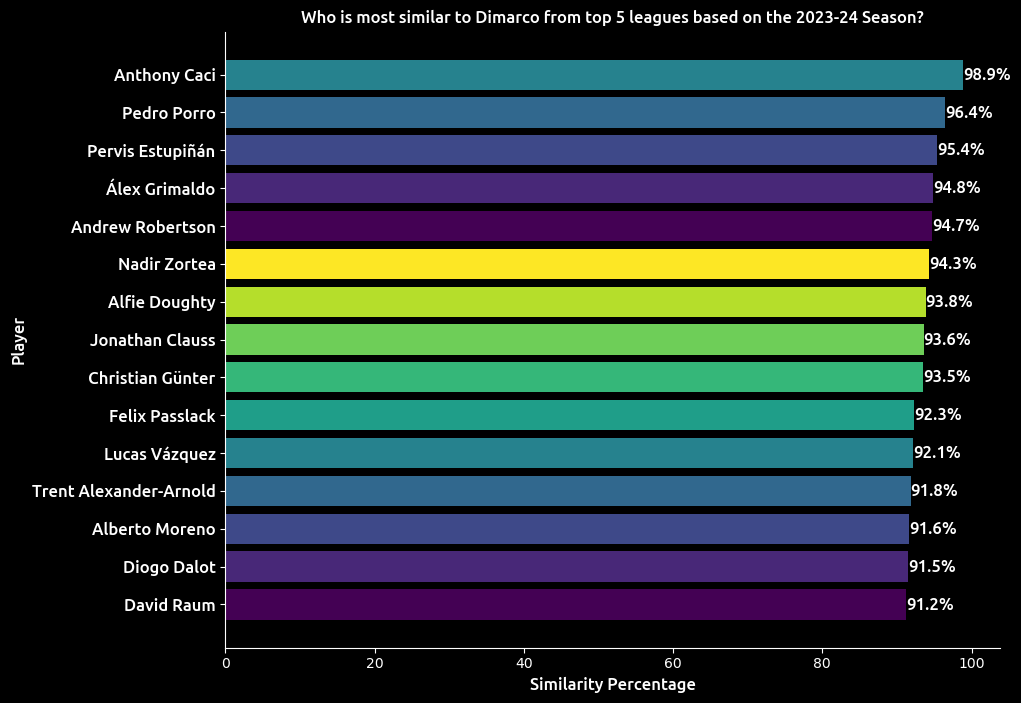

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_Dimarco_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_Dimarco_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_Dimarco_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Dimarco from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
